# 2.1 描述性统计

## A. 使用Pandas数据框自带的统计描述方法 

首先，加载数据文件到内存里

In [3]:
import pandas
pandas.read_csv("datasets/Facebook.csv", index_col=0)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,12.60,12.13,12.20,12.59,40510800.0,10.255996
2017-01-04,13.27,12.74,12.77,13.17,77638100.0,10.728471
2017-01-05,13.22,12.63,13.21,12.77,75628400.0,10.402627
2017-01-06,12.84,12.64,12.80,12.76,40315900.0,10.394479
2017-01-09,12.86,12.63,12.79,12.63,39438400.0,10.288579
...,...,...,...,...,...,...
2021-09-20,13.19,12.63,13.07,12.82,126152200.0,12.820000
2021-09-21,12.97,12.66,12.89,12.77,60473100.0,12.770000
2021-09-22,13.39,12.91,12.92,13.23,75784000.0,13.230000


它返回的是一个pandas.DataFrame的对象，我们称之为“数据框”类型。

我们把它赋给变量名为df的变量。

In [2]:
df = pandas.read_csv("datasets/Facebook_stockprice.csv", index_col=0)

如果只是想查看头和尾巴，可以使用`dataframe.head()`或者`dataframe.tail()`这两个方法。

In [4]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1191.000000,1191.000000,1191.000000,1191.000000,1.191000e+03,1191.000000
mean,10.225558,9.985802,10.113468,10.102712,5.308135e+07,9.394648
std,2.269341,2.251395,2.261142,2.262616,2.983678e+07,2.043040
min,4.420000,3.960000,4.270000,4.010000,9.549600e+06,4.010000
25%,8.895000,8.715000,8.810000,8.800000,3.319940e+07,8.369491
50%,10.260000,10.070000,10.170000,10.190000,4.456190e+07,9.287052
75%,11.830000,11.620000,11.715000,11.715000,6.391495e+07,10.318997
max,16.450001,15.800000,16.330000,15.990000,2.823941e+08,15.990000


它会返回我们的数据集的一些**基础描述性统计信息**。

这些会按照每一列的数据进行统计，结果包括：
- count : 个数
- mean : 均值
- std : 标准差
- min : 最小值
- 25% : 分位数为25%的数值
- 50% : 分位数为50%的数值
- 75% : 分位数为75%的数值
- max : 最大值

### 折线图

我们可以通过绘制折线图来了解数据框中的单个属性来观察其数据趋势：

<AxesSubplot:xlabel='Date'>

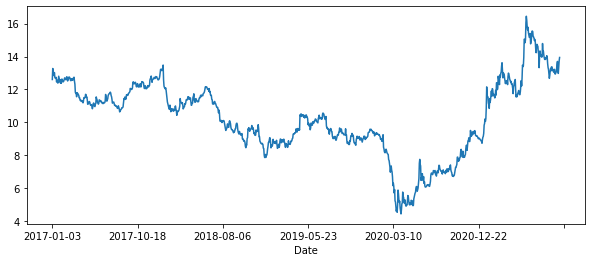

In [8]:
df['High'].plot(figsize=(10, 4))

### 频数图

或者通过绘制频数分布图（条状图）来了解数据的一个分布情况：

<AxesSubplot:>

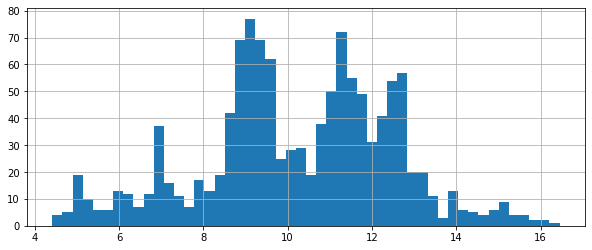

In [12]:
df['High'].hist(bins=50, figsize=(10, 4))

## B. 常用的描述性统计方法

Pandas常用统计方法


| 函数名称 | 作用 |  
| ---- | -------- | 
| count   | 非NA值的数量          |          
| min    |   最小值       |          
| max    |  最大值        |          
|mean |均值 |
| median| 中位数|
|var |方差 |
| std|标准差 |
| skew| 偏度|
| kurt| 峰度 |




Numpy常用统计方法

| 函数名称 | 作用 |  
| ---- | -------- |       
| min    |   最小值       |          
| max    |  最大值        |          
|mean |均值 |
| median| 中位数|
|var |方差 |
| std|标准差 |
|cov | 协方差|
| corrcoef | 相关系数 |


### 算术平均值

算术平均值用来描述一组数据，即“平均值”。它被定义为

$$
\mu =  \frac{\sum_{i=1}^{n}{x_i}}{n}
$$

这里$x_1$,...$x_n$是我们的观测值


In [5]:
import scipy.stats as stats
import numpy as np

In [6]:
x1 = [1, 2, 2, 3, 4, 5, 5, 7]

In [7]:
x2 = x1 + [10]
x2

[1, 2, 2, 3, 4, 5, 5, 7, 10]

In [8]:
print('x1的平均值:', np.mean(x1))
print('x2的平均值:', np.mean(x2))

x1的平均值: 3.625
x2的平均值: 4.333333333333333


### 中位数
顾名思义，一组数据的中位数是当以递减或递增顺序排列时出现在数据中间位置的数字。

数据中位数不容易受极端值的影响。

In [9]:
print('x1的中位数：', np.median(x1))
print('x2的中位数：', np.median(x2))

x1的中位数： 3.5
x2的中位数： 4.0


### Range(范围)

Rang(范围)是数据集中最大值和最小值之间的差异。毫不奇怪，它对异常值非常敏感。我们使用Numpy的ptp的函数来计算Range


In [10]:
print("Range of X: %s" %(np.ptp(x1)))

Range of X: 6


### MAD（平均绝对偏差）

平均绝对偏差是数据点距离算术平均值的偏差我们使用偏差的绝对值，这使得比平均值大5的数据点和比平均值小5的数据点对MAD均贡献5，否则偏差总和为0



$$
MAC = \frac{\sum_{i=1}\lvert{X_i-\mu} \rvert}{n}
$$

这里n是数据点的个数，μ是其平均值。

In [11]:
mu = np.mean(x1)
abs_dispersion = [np.abs(mu-x) for x in x1]
mad =np.sum(abs_dispersion)/len(abs_dispersion) 
print("x的平均绝对偏差：", mad)

x的平均绝对偏差： 1.625


### 方差和标准差

数据离散程度的度量最常用的指标就是方差和标准差。在金融市场更是如此，诺贝尔经济学奖得主马科维茨创造性地将投资的风险定义为收益率的方差，因此为现代金融工程的大厦做了坚实奠基。量化投资更是更是如此，对于风险的度量大多时候是通过方差、标准差来完成。


$$
\sigma^2 = \frac{\sum_{i=1}({X_i-\mu})^2}{n}
$$

In [12]:
print("X的方差", np.var(x1))
print("X的标准差", np.std(x1))

X的方差 3.484375
X的标准差 1.8666480653835098
